# Step-1 

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,plot_tree 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step-2 Create Database

In [4]:
data = {
    "Outlook": ["Sunny", "Sunny", "Overcast", "Rain", "Rain", "Overcast"],
    "Humidity": ["High", "High", "High", "Normal", "Normal", "Normal"],
    "Wind": ["Weak", "Strong", "Weak", "Weak", "Strong", "Strong"],
    "Play": ["No", "No", "Yes", "Yes", "No", "Yes"]
}

df = pd.DataFrame(data)
print(df)

    Outlook Humidity    Wind Play
0     Sunny     High    Weak   No
1     Sunny     High  Strong   No
2  Overcast     High    Weak  Yes
3      Rain   Normal    Weak  Yes
4      Rain   Normal  Strong   No
5  Overcast   Normal  Strong  Yes


# Step-3 Encoded with data

In [5]:
le = LabelEncoder()

for col in df.columns:
    df[col]=le.fit_transform(df[col])

print("\nEncoder Data:\n",df)


Encoder Data:
    Outlook  Humidity  Wind  Play
0        2         0     1     0
1        2         0     0     0
2        0         0     1     1
3        1         1     1     1
4        1         1     0     0
5        0         1     0     1


In [8]:
x = df.drop("Play",axis=1)
y = df["Play"]

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
x_train

,Outlook,Humidity,Wind
5,0,1,0
2,0,0,1
4,1,1,0
3,1,1,1


In [13]:
y_train

5    1
2    1
4    0
3    1
Name: Play, dtype: int64

In [14]:
model = DecisionTreeClassifier(criterion="entropy")
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [19]:
y_pred=model.predict(x_test)
print("Predictions:",y_pred)

Predictions: [1 0]


In [20]:
accuracy=accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)

accuracy: 0.5


In [25]:
new_data = pd.DataFrame([[2,1,1]],columns=x.columns)
prediction=model.predict(new_data)

print("New Data Prediction:","yes" if prediction[0] == 1 else "no")

New Data Prediction: yes


In [29]:
importances = model.feature_importances_

for features, importance in zip(x.columns,importances):
 print(f"{features}: {importance:.3f}")

Outlook: 0.616
Humidity: 0.000
Wind: 0.384


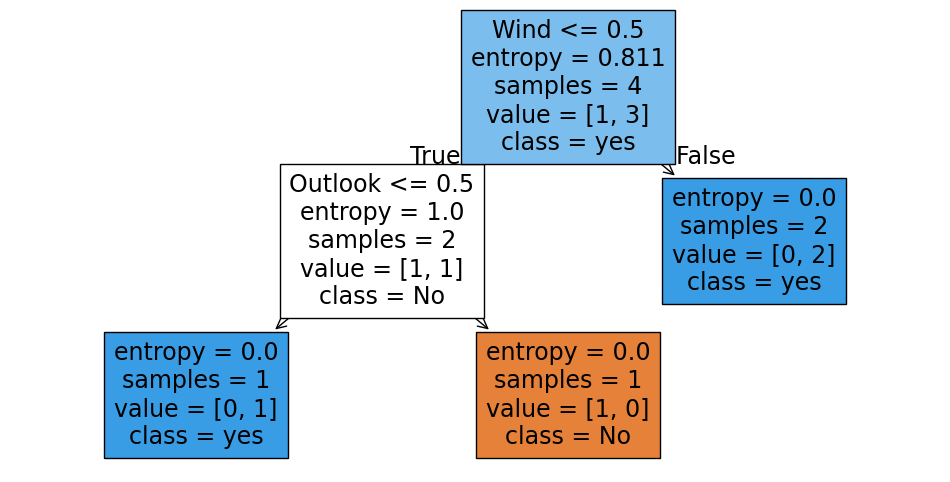

In [36]:
plt.figure(figsize=(12,6))
plot_tree(
    model,
    feature_names=list(x.columns),
    class_names=["No","yes"],
    filled=True
)
plt.show() 